#### =============================================================================
#### PERCEPTRON Modeli
#### =============================================================================

#### Veri Yükleme

PERCEPTRON MODELİ - Veri Yükleme

 Veri Yüklendi!
   • X_train: (10422, 92)
   • X_test: (2606, 92)
   • Özellik Sayısı: 92
   • Sınıf Sayısı: 11

 Sınıf Dağılımı:

Train Seti:
Kingdom_Encoded
0      101
1     2336
2     1076
3      458
4      176
5       14
6     2018
7      144
8      172
9     2265
10    1662
Name: count, dtype: int64

Test Seti:
Kingdom_Encoded
0      25
1     584
2     269
3     114
4      44
5       4
6     505
7      36
8      43
9     567
10    415
Name: count, dtype: int64


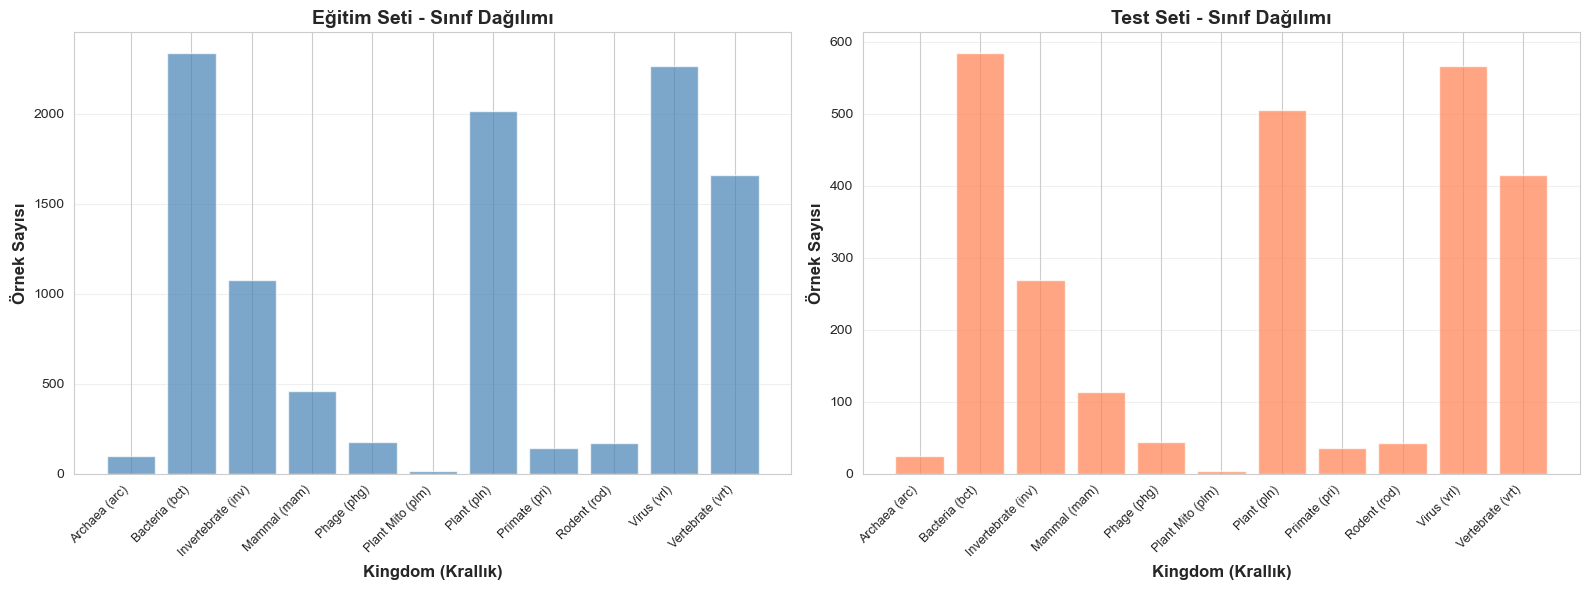

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, precision_recall_fscore_support)
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)


# VERİ YÜKLEME

print("PERCEPTRON MODELİ - Veri Yükleme")

# CSV dosyalarını yükle
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')
y_train = pd.read_csv('y_train_processed.csv')['Kingdom_Encoded']
y_test = pd.read_csv('y_test_processed.csv')['Kingdom_Encoded']

# İsimli hedef değişkenleri de yükle
y_train_with_names = pd.read_csv('y_train_with_names.csv')
y_test_with_names = pd.read_csv('y_test_with_names.csv')

print(f"\n Veri Yüklendi!")
print(f"   • X_train: {X_train.shape}")
print(f"   • X_test: {X_test.shape}")
print(f"   • Özellik Sayısı: {X_train.shape[1]}")
print(f"   • Sınıf Sayısı: {len(y_train.unique())}")

# Krallık isimleri
kingdom_names = {
    0: 'Archaea (arc)', 
    1: 'Bacteria (bct)', 
    2: 'Invertebrate (inv)',
    3: 'Mammal (mam)', 
    4: 'Phage (phg)', 
    5: 'Plant Mito (plm)',
    6: 'Plant (pln)', 
    7: 'Primate (pri)', 
    8: 'Rodent (rod)',
    9: 'Virus (vrl)', 
    10: 'Vertebrate (vrt)'
}


# SINIF DAĞILIMI ANALİZİ
print("\n Sınıf Dağılımı:")
print("\nTrain Seti:")
print(y_train.value_counts().sort_index())
print("\nTest Seti:")
print(y_test.value_counts().sort_index())

# Görselleştirme: Sınıf Dağılımı
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

train_dist = y_train.value_counts().sort_index()
axes[0].bar(range(len(train_dist)), train_dist.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Kingdom (Krallık)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Örnek Sayısı', fontsize=12, fontweight='bold')
axes[0].set_title('Eğitim Seti - Sınıf Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(train_dist)))
axes[0].set_xticklabels([kingdom_names[i] for i in range(len(train_dist))], 
                        rotation=45, ha='right', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)

test_dist = y_test.value_counts().sort_index()
axes[1].bar(range(len(test_dist)), test_dist.values, color='coral', alpha=0.7)
axes[1].set_xlabel('Kingdom (Krallık)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Örnek Sayısı', fontsize=12, fontweight='bold')
axes[1].set_title('Test Seti - Sınıf Dağılımı', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(len(test_dist)))
axes[1].set_xticklabels([kingdom_names[i] for i in range(len(test_dist))], 
                        rotation=45, ha='right', fontsize=9)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### PERCEPTRON MODELİ EĞİTİMİ

 PERCEPTRON Modeli Eğitimi

 Model eğitiliyor...
 Model eğitimi tamamlandı!
   • Gerçekleşen iterasyon: 19

 Performans Metrikleri:
   • Eğitim Doğruluğu: 0.7706 (77.06%)
   • Test Doğruluğu: 0.7640 (76.40%)
   • Overfitting Farkı: 0.66%

 Detaylı Sınıflandırma Raporu (Test Seti):
                    precision    recall  f1-score   support

     Archaea (arc)     0.2895    0.4400    0.3492        25
    Bacteria (bct)     0.8209    0.9024    0.8597       584
Invertebrate (inv)     0.7066    0.4387    0.5413       269
      Mammal (mam)     0.7170    0.3333    0.4551       114
       Phage (phg)     0.8182    0.4091    0.5455        44
  Plant Mito (plm)     0.0000    0.0000    0.0000         4
       Plant (pln)     0.7966    0.7525    0.7739       505
     Primate (pri)     0.4500    0.2500    0.3214        36
      Rodent (rod)     0.6667    0.4186    0.5143        43
       Virus (vrl)     0.8612    0.8642    0.8627       567
  Vertebrate (vrt)     0.6643    0.9205    0.7717       4

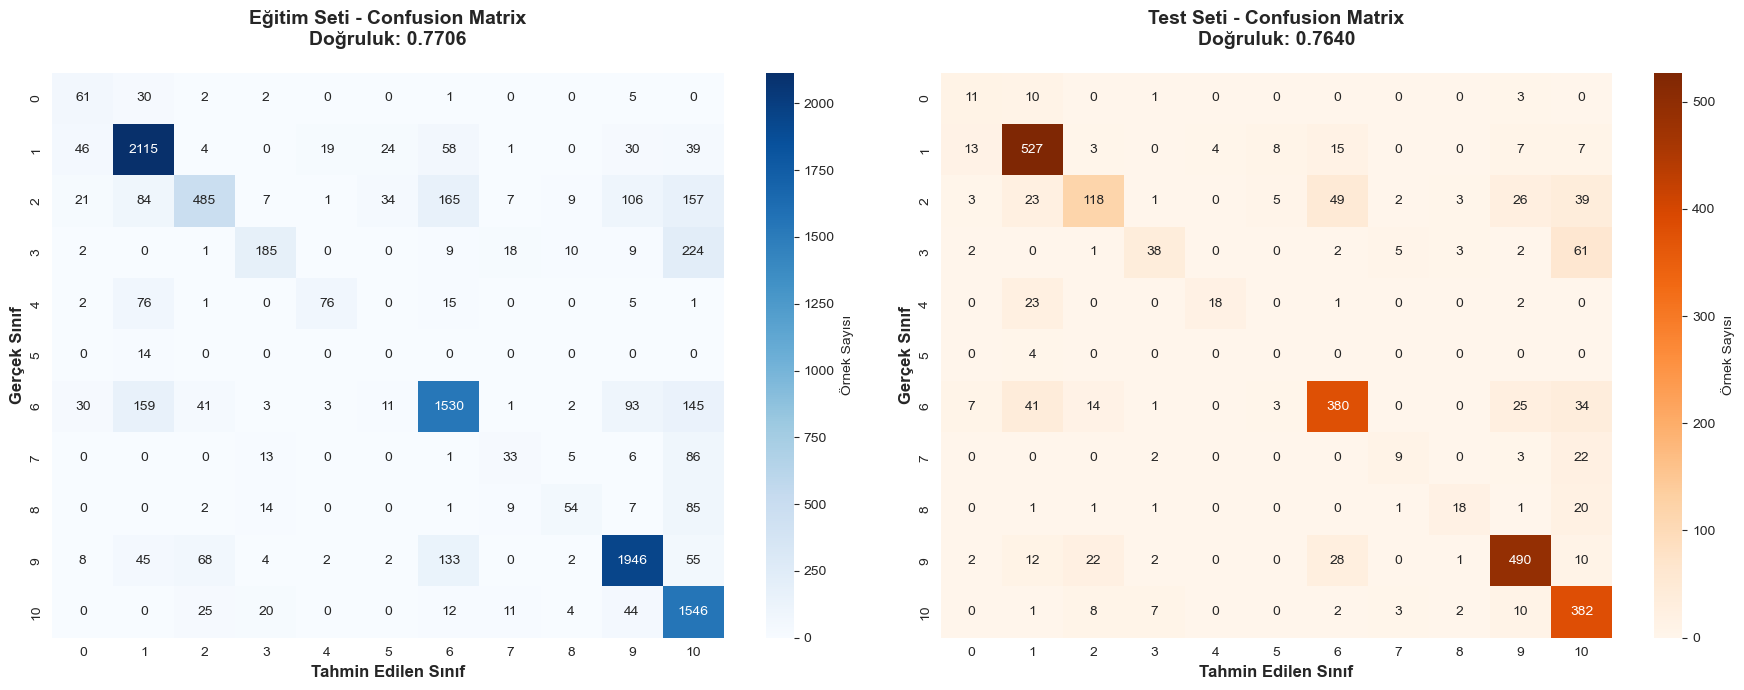

In [2]:
print(" PERCEPTRON Modeli Eğitimi")

# Perceptron Modeli
perceptron_model = Perceptron(
    max_iter=1000,
    tol=1e-3,
    eta0=0.1,
    random_state=42,
    penalty='l2',
    alpha=0.0001,
    n_jobs=-1
)
print("\n Model eğitiliyor...")
perceptron_model.fit(X_train, y_train)
print(" Model eğitimi tamamlandı!")
print(f"   • Gerçekleşen iterasyon: {perceptron_model.n_iter_}")

# Tahminler
y_train_pred = perceptron_model.predict(X_train)
y_test_pred = perceptron_model.predict(X_test)

# Doğruluk skorları
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n Performans Metrikleri:")
print(f"   • Eğitim Doğruluğu: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   • Test Doğruluğu: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   • Overfitting Farkı: {(train_accuracy - test_accuracy)*100:.2f}%")




# DETAYLI SINIFLANDIRMA RAPORU
print("\n Detaylı Sınıflandırma Raporu (Test Seti):")
print(classification_report(y_test, y_test_pred, 
                           target_names=[kingdom_names[i] for i in range(11)],
                           digits=4, zero_division=0))


# CONFUSION MATRIX
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Train Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
            ax=axes[0], cbar_kws={'label': 'Örnek Sayısı'})
axes[0].set_title(f'Eğitim Seti - Confusion Matrix\nDoğruluk: {train_accuracy:.4f}', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Tahmin Edilen Sınıf', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Gerçek Sınıf', fontsize=12, fontweight='bold')

# Test Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            ax=axes[1], cbar_kws={'label': 'Örnek Sayısı'})
axes[1].set_title(f'Test Seti - Confusion Matrix\nDoğruluk: {test_accuracy:.4f}', 
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Tahmin Edilen Sınıf', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Gerçek Sınıf', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### SINIF BAZLI PERFORMANS METRİKLERİ

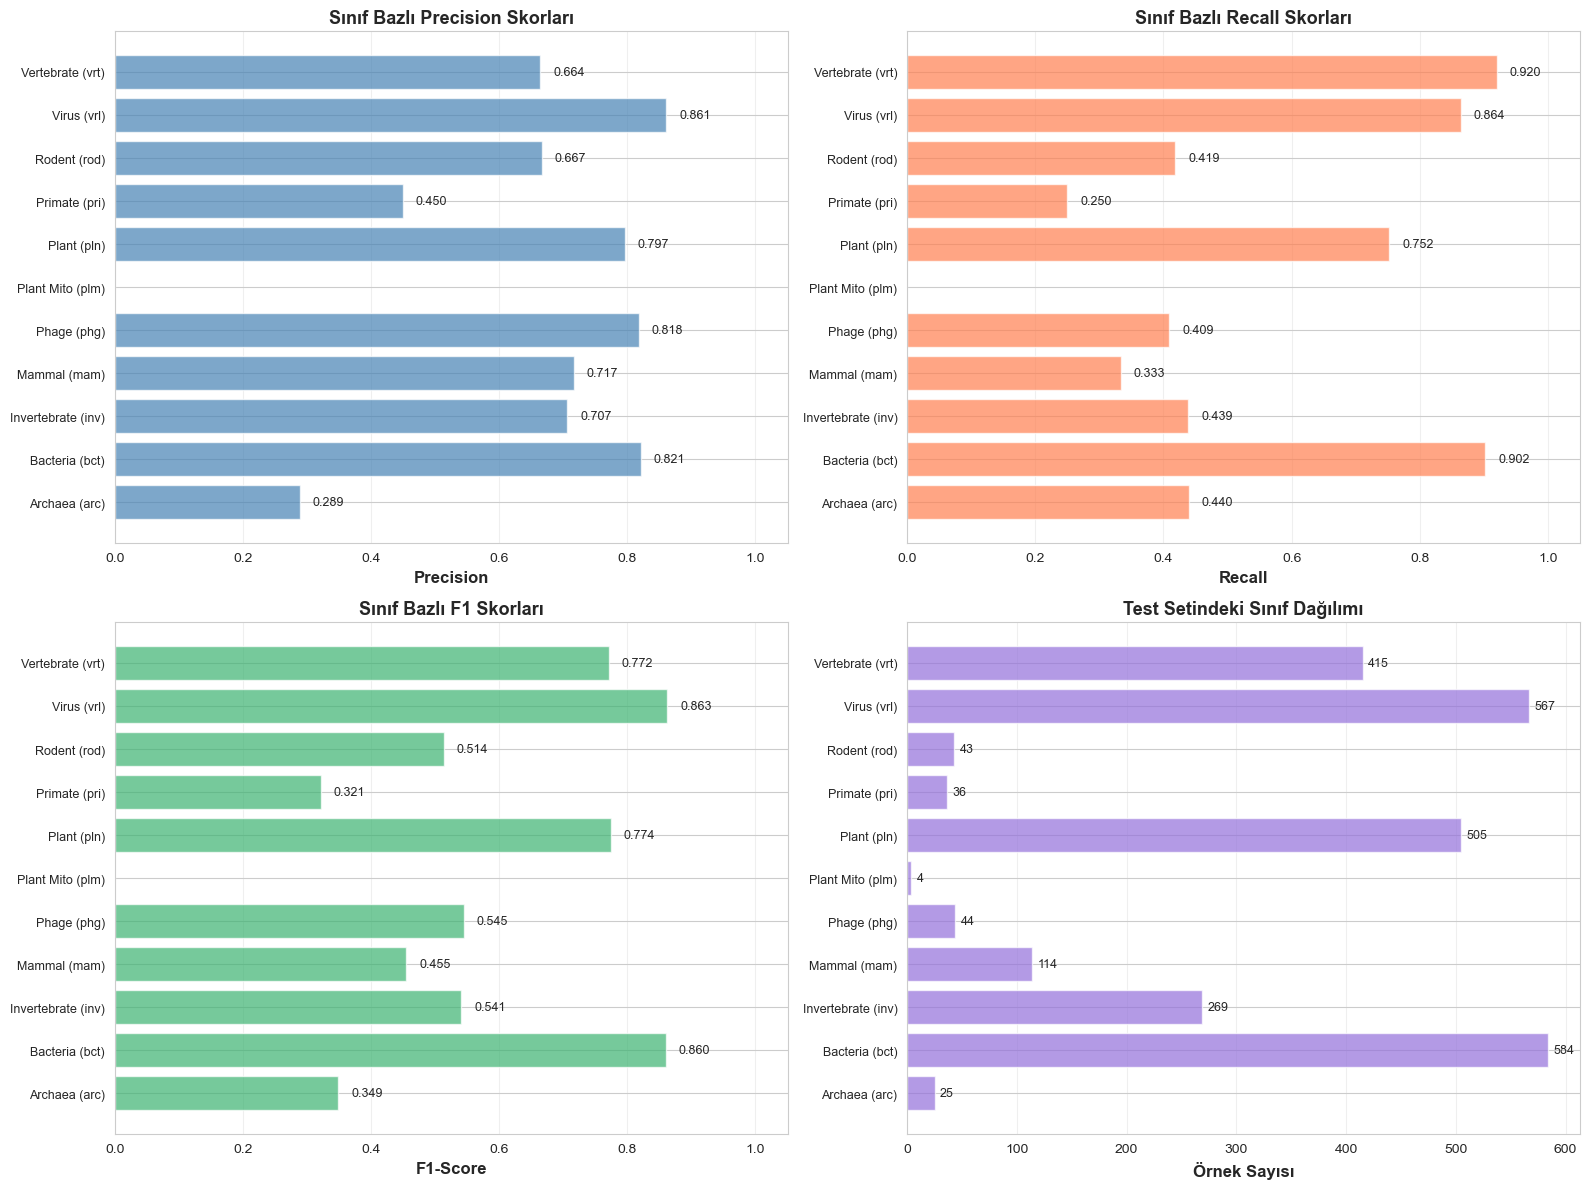

In [3]:
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_test_pred, average=None, zero_division=0
)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Precision
axes[0, 0].barh(range(len(precision)), precision, color='steelblue', alpha=0.7)
axes[0, 0].set_yticks(range(len(precision)))
axes[0, 0].set_yticklabels([kingdom_names[i] for i in range(len(precision))], fontsize=9)
axes[0, 0].set_xlabel('Precision', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Sınıf Bazlı Precision Skorları', fontsize=13, fontweight='bold')
axes[0, 0].set_xlim(0, 1.05)
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(precision):
    if v > 0:
        axes[0, 0].text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=9)

# Recall
axes[0, 1].barh(range(len(recall)), recall, color='coral', alpha=0.7)
axes[0, 1].set_yticks(range(len(recall)))
axes[0, 1].set_yticklabels([kingdom_names[i] for i in range(len(recall))], fontsize=9)
axes[0, 1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Sınıf Bazlı Recall Skorları', fontsize=13, fontweight='bold')
axes[0, 1].set_xlim(0, 1.05)
axes[0, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(recall):
    if v > 0:
        axes[0, 1].text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=9)

# F1-Score
axes[1, 0].barh(range(len(f1)), f1, color='mediumseagreen', alpha=0.7)
axes[1, 0].set_yticks(range(len(f1)))
axes[1, 0].set_yticklabels([kingdom_names[i] for i in range(len(f1))], fontsize=9)
axes[1, 0].set_xlabel('F1-Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Sınıf Bazlı F1 Skorları', fontsize=13, fontweight='bold')
axes[1, 0].set_xlim(0, 1.05)
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(f1):
    if v > 0:
        axes[1, 0].text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=9)

# Support
axes[1, 1].barh(range(len(support)), support, color='mediumpurple', alpha=0.7)
axes[1, 1].set_yticks(range(len(support)))
axes[1, 1].set_yticklabels([kingdom_names[i] for i in range(len(support))], fontsize=9)
axes[1, 1].set_xlabel('Örnek Sayısı', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Test Setindeki Sınıf Dağılımı', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(support):
    axes[1, 1].text(v + 5, i, f'{int(v)}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

#### HATA ANALİZİ

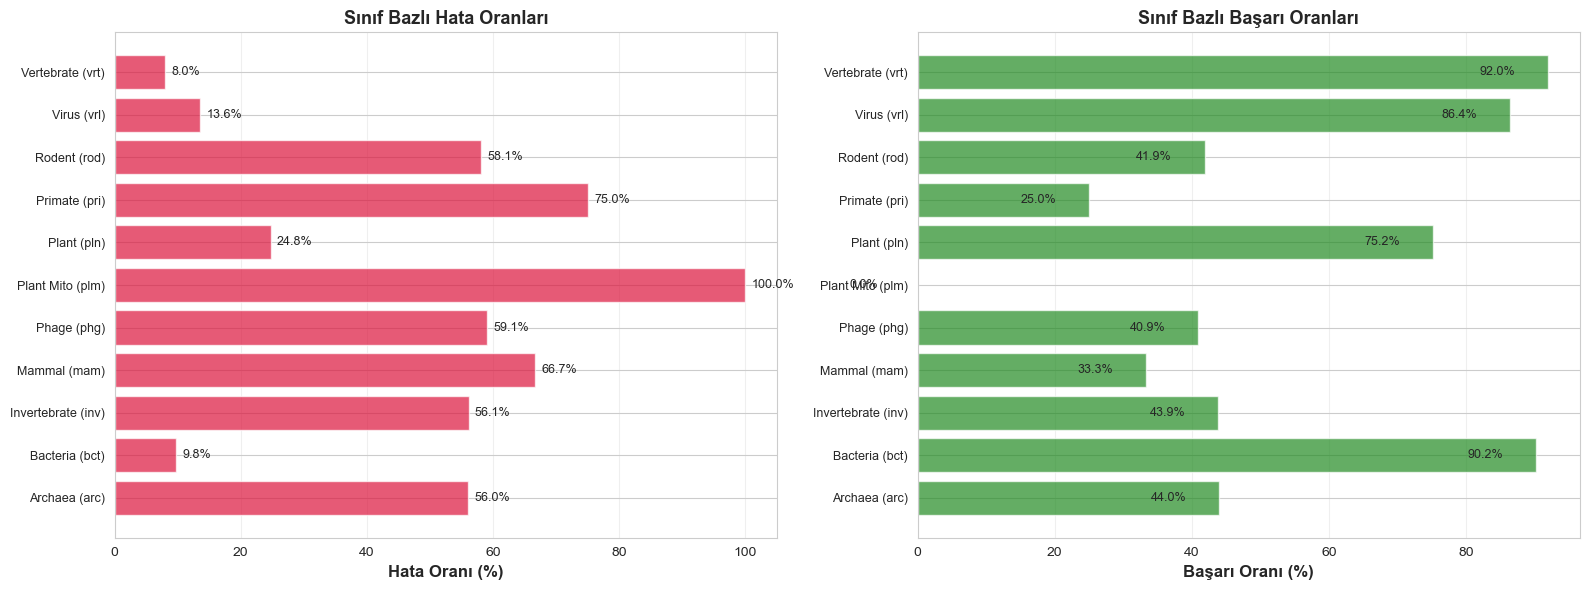

In [5]:
errors = cm_test.copy()
np.fill_diagonal(errors, 0)

class_errors = errors.sum(axis=1)
total_samples = cm_test.sum(axis=1)
error_rates = class_errors / total_samples

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hata Oranları
axes[0].barh(range(len(error_rates)), error_rates * 100, color='crimson', alpha=0.7)
axes[0].set_yticks(range(len(error_rates)))
axes[0].set_yticklabels([kingdom_names[i] for i in range(len(error_rates))], fontsize=9)
axes[0].set_xlabel('Hata Oranı (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Sınıf Bazlı Hata Oranları', fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(error_rates):
    axes[0].text(v * 100 + 1, i, f'{v*100:.1f}%', va='center', fontsize=9)

# Başarı Oranları
success_rates = 1 - error_rates
axes[1].barh(range(len(success_rates)), success_rates * 100, color='forestgreen', alpha=0.7)
axes[1].set_yticks(range(len(success_rates)))
axes[1].set_yticklabels([kingdom_names[i] for i in range(len(success_rates))], fontsize=9)
axes[1].set_xlabel('Başarı Oranı (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Sınıf Bazlı Başarı Oranları', fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(success_rates):
    axes[1].text(v * 100 - 10, i, f'{v*100:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()
